#Bài tập lớn Phân tích dữ liệu lớn

## Tiền xử lý dữ liệu

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import StratifiedKFold, cross_val_score
from google.colab import drive
import pickle

In [72]:
!gdown --id 1N8SoX2xEBqxeD9bjPBf9lnlsGey94jtS

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1N8SoX2xEBqxeD9bjPBf9lnlsGey94jtS
To: /content/framingham.csv
100% 192k/192k [00:00<00:00, 10.2MB/s]


In [73]:
# Bộ dữ liệu CHD-framingham chưa qua xử lý
CHD_path = ('/content/framingham.csv')
# CHD_path = ('/content/CHD_preprocessed.csv')
df = pd.read_csv(CHD_path)
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [74]:
df.shape

(4240, 16)

In [75]:
#Describe data
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [76]:
# Thống kê dữ liệu khuyết
df.isna().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [77]:
# Xử lí dữ liệu khuyết thiếu
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)

<ipython-input-77-19f4d1a0a45e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)
<ipython-input-77-19f4d1a0a45e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [79]:
df.isna().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [80]:
# Bảng tóm lược dữ liệu
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,9.005937,0.029245,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


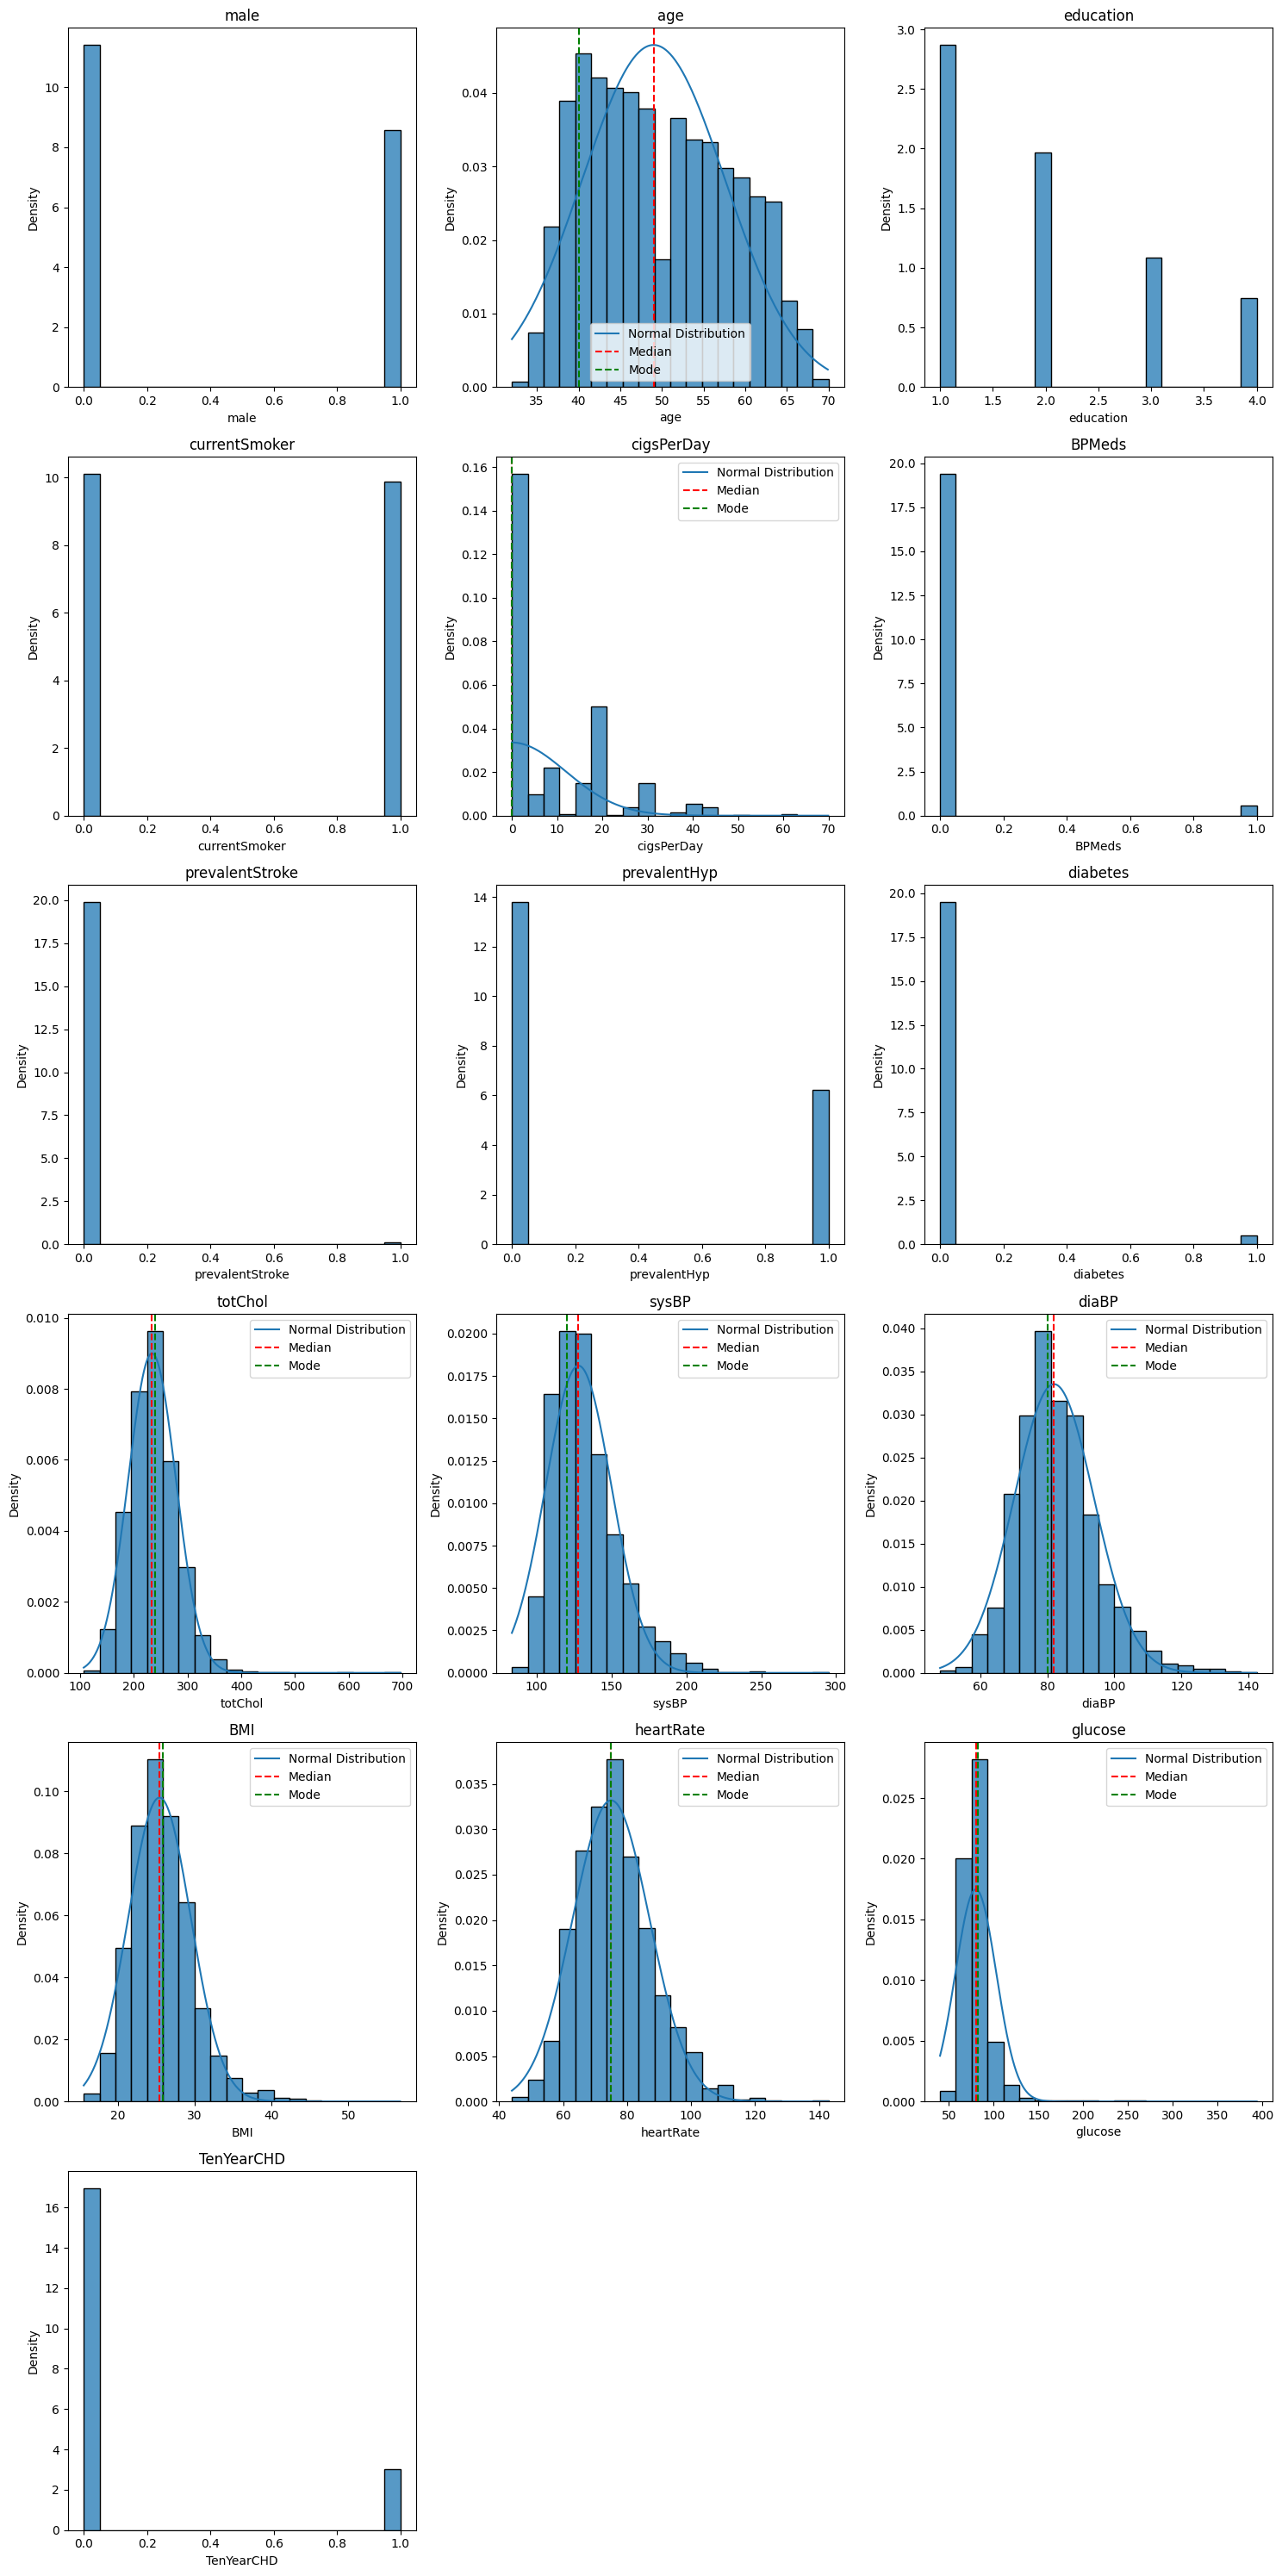

In [81]:
# View standard distribution
float_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'] #Cac cot du lieu lien tuc

cols = df.columns
num_cols = len(cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows for subplots

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # Create subplots

axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(cols):

    sns.histplot(df[col], ax=axes[i], stat="density", bins = 20)  # Plot histogram on the current subplot
    axes[i].set_title(col)  # Set title for the subplot

    # Calculate and plot median and mode
    if col in float_cols:
      median = df[col].median()
      mode = df[col].mode()[0]
      rng = np.arange(df[col].min(), df[col].max(), 0.1)
      axes[i].plot(rng, stats.norm.pdf(rng, loc=median, scale=df[col].std()), label='Normal Distribution')
      axes[i].axvline(median, color='r', linestyle='--', label='Median')
      axes[i].axvline(mode, color='g', linestyle='--', label='Mode')
      axes[i].legend()

# Hide any unused subplots
for i in range(num_cols, num_rows * 3):
    axes[i].set_visible(False)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()




Qua biểu đồ ta thấy, thuộc tính prevalentStroke, diabetes, BPMeds bị mất cân bằng nghiêm trọng. Cột dữ liệu thuộc tính mục tiêu TenYearCHD có mất cân bằng ở mức trung bình. Với các cột có giá trị liên tục, tất cả các cột đều đảm bảo phân phối chuẩn.

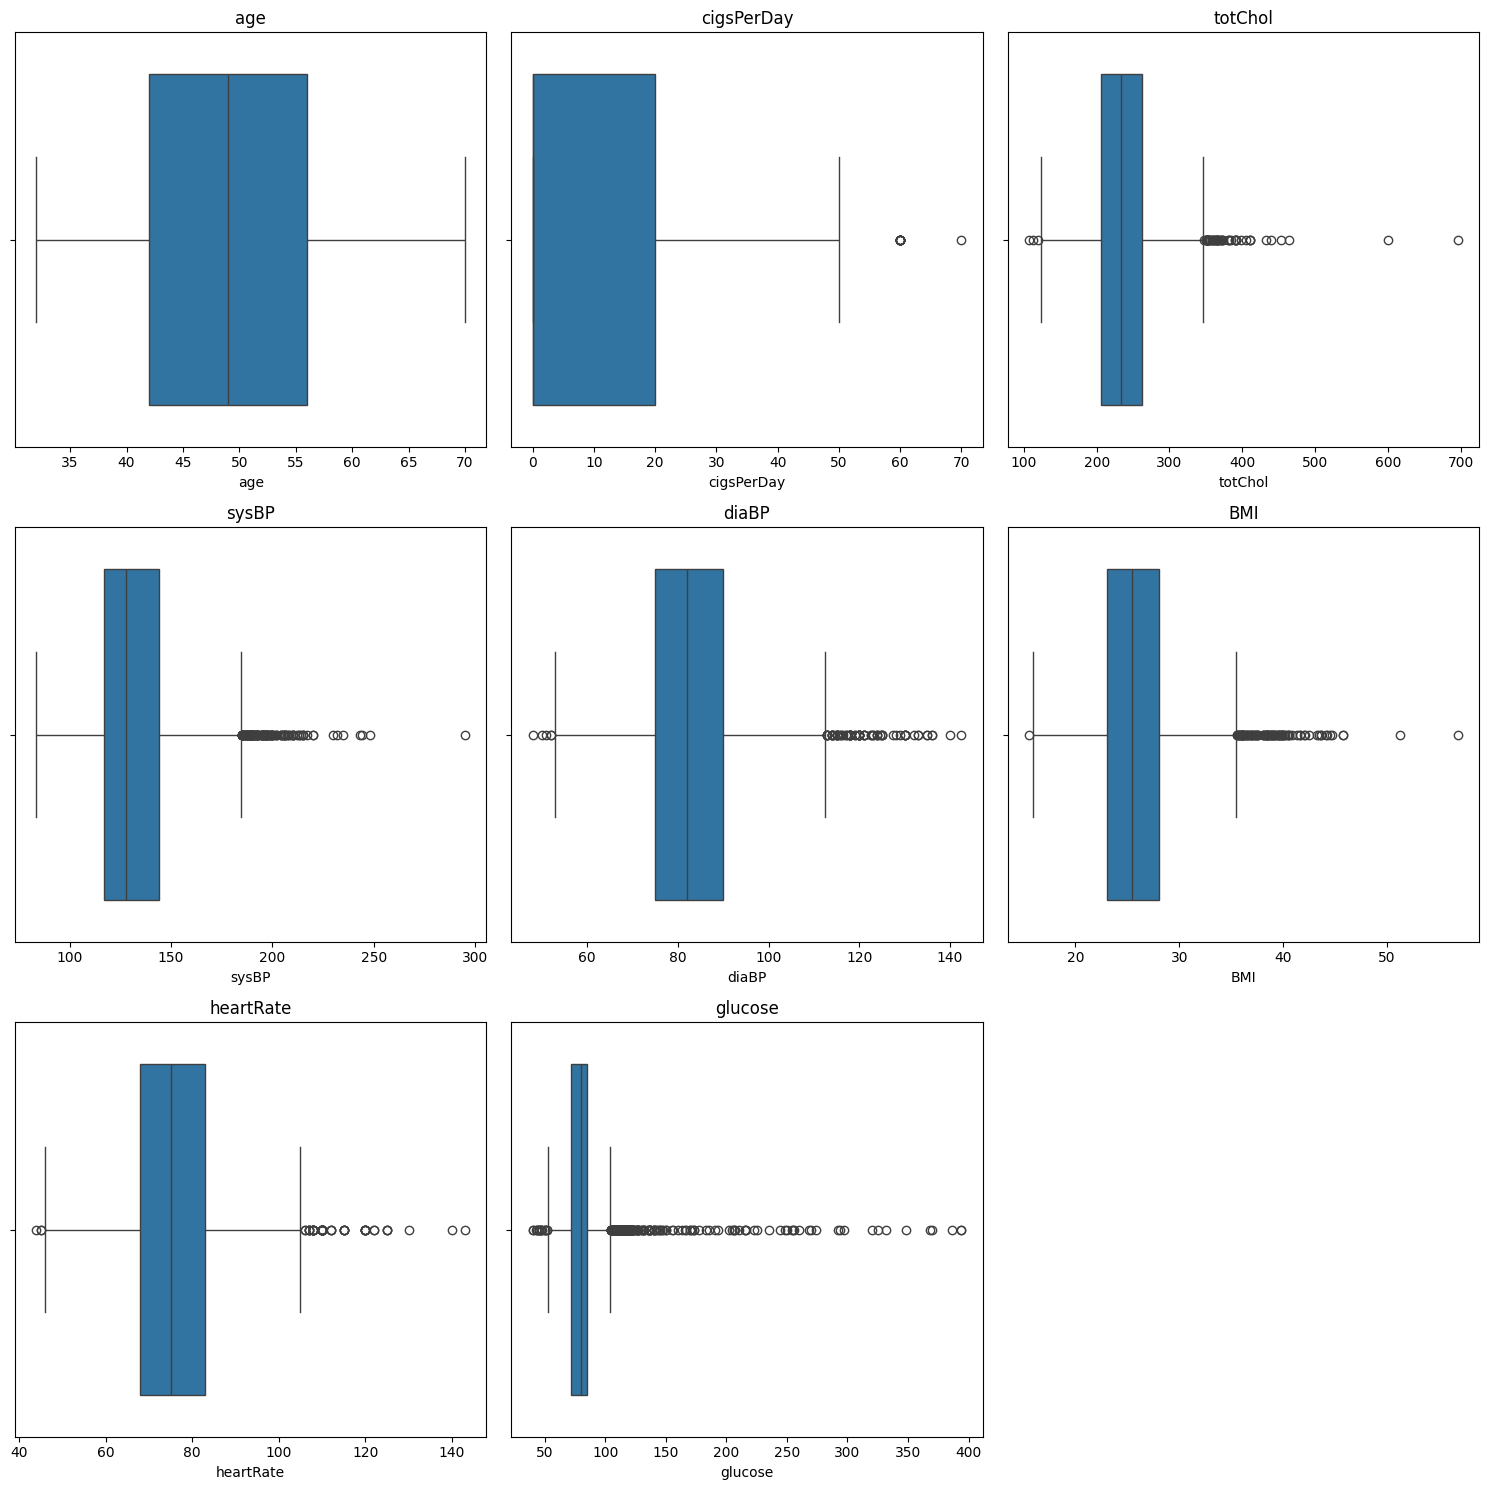

In [82]:
# View outlier with boxplot

# Calculate number of rows for subplots based on float columns
num_cols = len(float_cols)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(float_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for i in range(num_cols, num_rows * 3):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [83]:
# Processing outliers
z_threshold = 3

for col in float_cols:
    # Tính trung bình và độ lệch chuẩn của cột
    mean = df[col].mean()
    std = df[col].std()

    # Tính Z-score
    z_scores = (df[col] - mean) / std

    # Xác định các chỉ số vượt ngưỡng Z-score
    index_lower = np.where(z_scores < -z_threshold)[0]
    index_upper = np.where(z_scores > z_threshold)[0]

    # In số lượng outliers
    print(col + ":", len(index_lower), len(index_upper))

    # Xử lý outliers: Thay thế bằng ngưỡng
    lower_threshold = mean - z_threshold * std
    upper_threshold = mean + z_threshold * std
    df.loc[index_lower, col] = lower_threshold
    df.loc[index_upper, col] = upper_threshold


age: 0 0
cigsPerDay: 0 21
totChol: 0 25
sysBP: 0 48
diaBP: 0 41
BMI: 0 60
heartRate: 0 23
glucose: 0 50


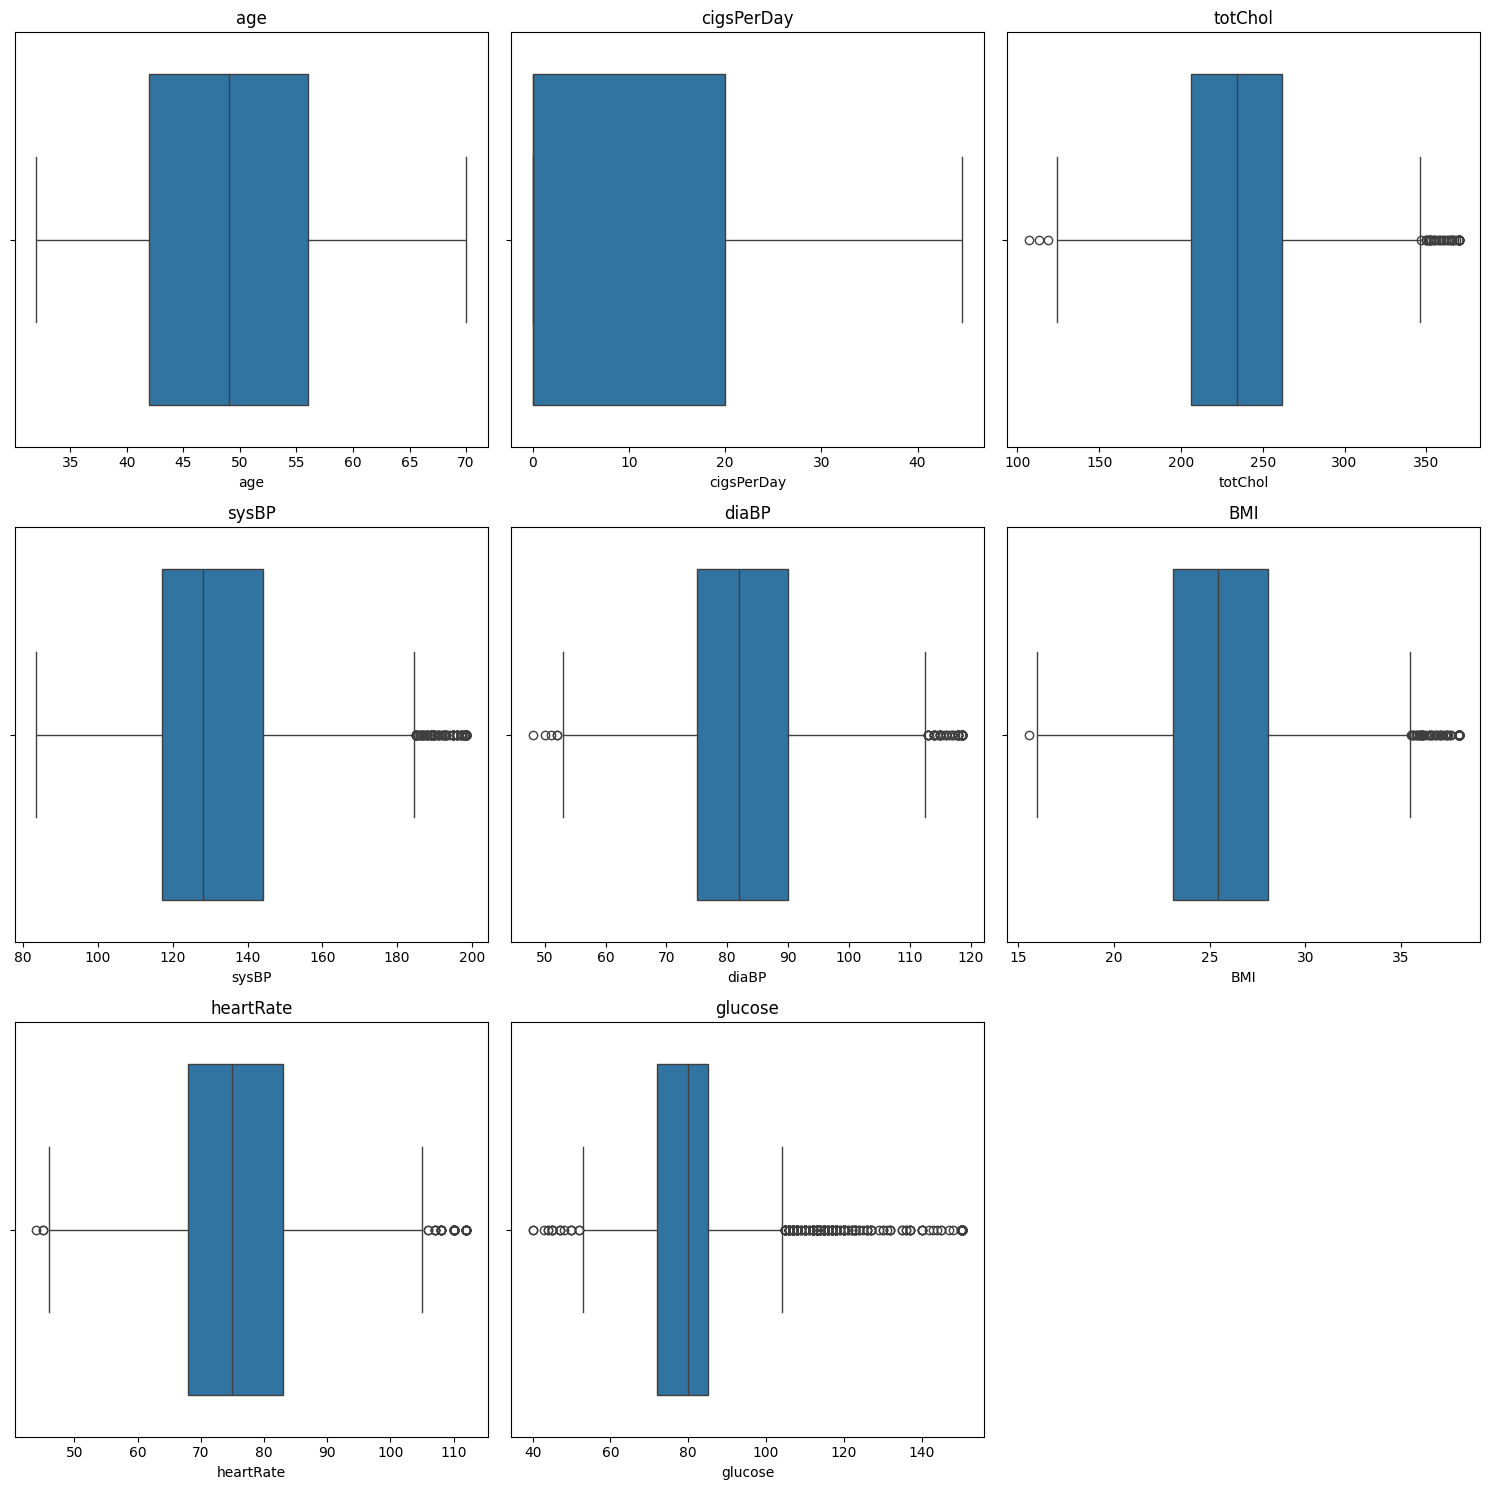

In [84]:
# View outliers with float_value again
num_cols = len(float_cols)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(float_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for i in range(num_cols, num_rows * 3):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [85]:
df['education'].astype(int)

,education
0,4
1,2
2,1
3,3
4,3
...,...
4235,2
4236,1
4237,2
4238,3


In [86]:
# Hàm phát hiện và đánh dấu outliers bằng IQR
def identify_outliers_iqr(df, columns):
    outliers = pd.DataFrame(False, index=df.index, columns=columns)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
    return outliers

In [87]:
outliers = identify_outliers_iqr(df, float_cols)

In [88]:
# Loại bỏ những hàng có ít nhất một outlier
df_no_outliers = df[~outliers.any(axis=1)]

# Lọc các dòng có nhãn TenYearCHD = 0 và TenYearCHD = 1
df_label_zero = df_no_outliers[df_no_outliers['TenYearCHD'] == 0]
df_label_one = df_no_outliers[df_no_outliers['TenYearCHD'] == 1]

# Các cột cần xử lý với SMOTEENN
cols = ['BPMeds', 'prevalentStroke', 'diabetes']
threshold = 0.3
# Áp dụng SMOTEENN cho các cột có giá trị mất cân bằng (chỉ với nhãn TenYearCHD = 1)
for col in cols:
    # Tạo X và y cho SMOTEENN với nhãn TenYearCHD = 1
    X_resample = df_label_one.drop(columns=[col])  # Loại bỏ cột nhãn và cột cần resample
    y_resample = df_label_one[col]  # Chỉ lấy cột nhãn

    # Số mẫu thiểu số (1) và đa số (0) hiện tại
    n_samples_minority = y_resample.value_counts().get(1, 0)
    n_samples_majority = y_resample.value_counts().get(0, 0)

    if n_samples_minority < 2:
        print(f"Không đủ mẫu trong lớp thiểu số để áp dụng SMOTE cho {col}. Bỏ qua.")
        continue

    # Tính số mẫu thiểu số tối đa sau khi tái mẫu (30% của mẫu đa số ban đầu)
    max_minority_samples = int(threshold * n_samples_majority)

    # Nếu số mẫu thiểu số đã lớn hơn giới hạn, bỏ qua SMOTE
    if n_samples_minority >= max_minority_samples:
        print(f"Lớp thiểu số cho {col} đã đạt ngưỡng 30%. Không áp dụng resampling.")
        continue

    # Đặt tỷ lệ sampling_strategy cho SMOTE
    smote = SMOTE(
        random_state=42,
        k_neighbors=min(n_samples_minority - 1, 5),  # Không vượt quá số mẫu thiểu số
        sampling_strategy= threshold  # Giới hạn tỷ lệ lớp thiểu số
    )
    enn = EditedNearestNeighbours()

    # Áp dụng SMOTEENN với các tham số đã chỉnh sửa
    smoteenn = SMOTEENN(smote=smote, enn=enn, random_state=42)
    X_resampled, y_resampled = smoteenn.fit_resample(X_resample, y_resample)

    # Gộp lại dữ liệu đã resampling
    df_label_one = pd.concat([pd.DataFrame(X_resampled, columns=X_resample.columns),
                             pd.DataFrame(y_resampled, columns=[col])], axis=1)

    # Chuyển đổi nhãn nhị phân về dạng 0 và 1
    df_label_one[col] = (df_label_one[col] > 0.5).astype(int)

    # Kiểm tra phân phối của nhãn sau khi resampling
    print(f"Phân phối của {col} sau khi resampling:\n", df_label_one[col].value_counts())

# Gộp lại dữ liệu nhãn 0 và nhãn 1
df_no_outliers = pd.concat([df_label_zero, df_label_one], axis=0).reset_index(drop=True)

# Kiểm tra phân phối nhãn cuối cùng
print("Phân phối TenYearCHD cuối cùng:")
print(df_no_outliers['TenYearCHD'].value_counts())

Phân phối của BPMeds sau khi resampling:
 BPMeds
0    363
1    141
Name: count, dtype: int64
Phân phối của prevalentStroke sau khi resampling:
 prevalentStroke
0    465
1    149
Name: count, dtype: int64
Phân phối của diabetes sau khi resampling:
 diabetes
0    604
1    183
Name: count, dtype: int64
Phân phối TenYearCHD cuối cùng:
TenYearCHD
0    3179
1     787
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

In [89]:
# # Lọc dữ liệu chỉ chứa outliers
df_outliers = df[outliers.any(axis=1)]  # Lấy các dòng chứa outliers

condition_to_remove = (df_outliers['TenYearCHD'] == 0) & (df_outliers['BPMeds'] == 0) & (df_outliers['prevalentStroke'] == 0) & (df_outliers['diabetes'] == 0)

# Lọc bỏ các dòng thỏa mãn điều kiện
df_filtered = df_outliers[~condition_to_remove]



In [90]:
df_combined = pd.concat([df_filtered, df_no_outliers], axis=0).reset_index(drop=True)

# df_combined = pd.concat([df_outliers, df_no_outliers], axis=0).reset_index(drop=True)

In [91]:
df.to_csv('/content/framingham_processed.csv', index=False)

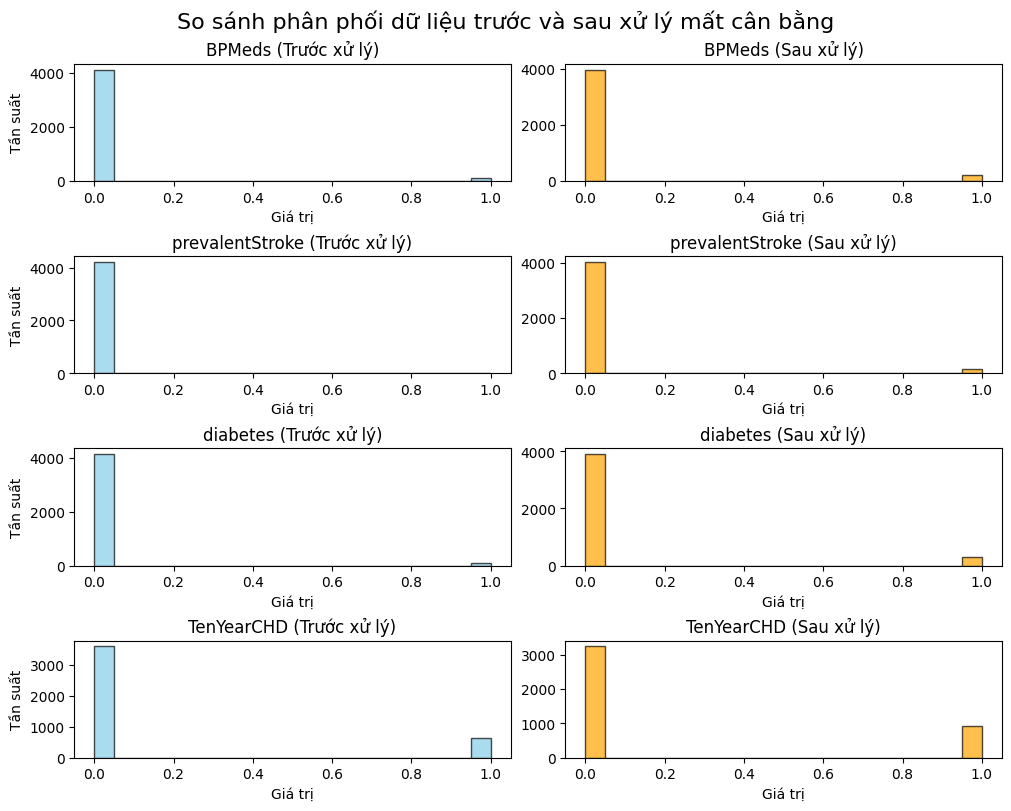

In [92]:
cols = ['BPMeds', 'prevalentStroke', 'diabetes', 'TenYearCHD']
fig, axes = plt.subplots(len(cols), 2, figsize=(10, 8), constrained_layout=True)

for i, col in enumerate(cols):
    # Vẽ histogram cho dữ liệu chưa xử lý
    axes[i, 0].hist(df[col], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
    axes[i, 0].set_title(f"{col} (Trước xử lý)")
    axes[i, 0].set_ylabel("Tần suất")

    # Vẽ histogram cho dữ liệu đã xử lý
    axes[i, 1].hist(df_combined[col], bins=20, color='orange', alpha=0.7, edgecolor='black')
    axes[i, 1].set_title(f"{col} (Sau xử lý)")

# Thêm nhãn trục x và y
for ax in axes.flat:
    ax.set_xlabel("Giá trị")

# Hiển thị biểu đồ
plt.suptitle("So sánh phân phối dữ liệu trước và sau xử lý mất cân bằng", fontsize=16)
plt.show()


In [93]:
df_combined['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3257
1,939


In [94]:
df_combined['education'] = df_combined['education'].round().astype(int)


In [95]:
# Normalization for this data
float_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
df_mean = df_combined[float_cols].mean().values
df_std = df_combined[float_cols].std().values
print(df_mean, df_std)
with open('mean_std.txt', "wb") as f:
  f.write(df_mean)
  f.write(df_std)

scaler = StandardScaler()
for col in float_cols:
  df_combined[col] = scaler.fit_transform(df_combined[[col]])


[ 49.49833174   9.46849535 236.64706511 130.72533967  82.11699671
  25.60318154  75.44332851  79.59149308] [ 8.4929893  11.64949992 40.720829   20.66544055 11.6539426   3.56207153
 11.11330976 13.65492183]


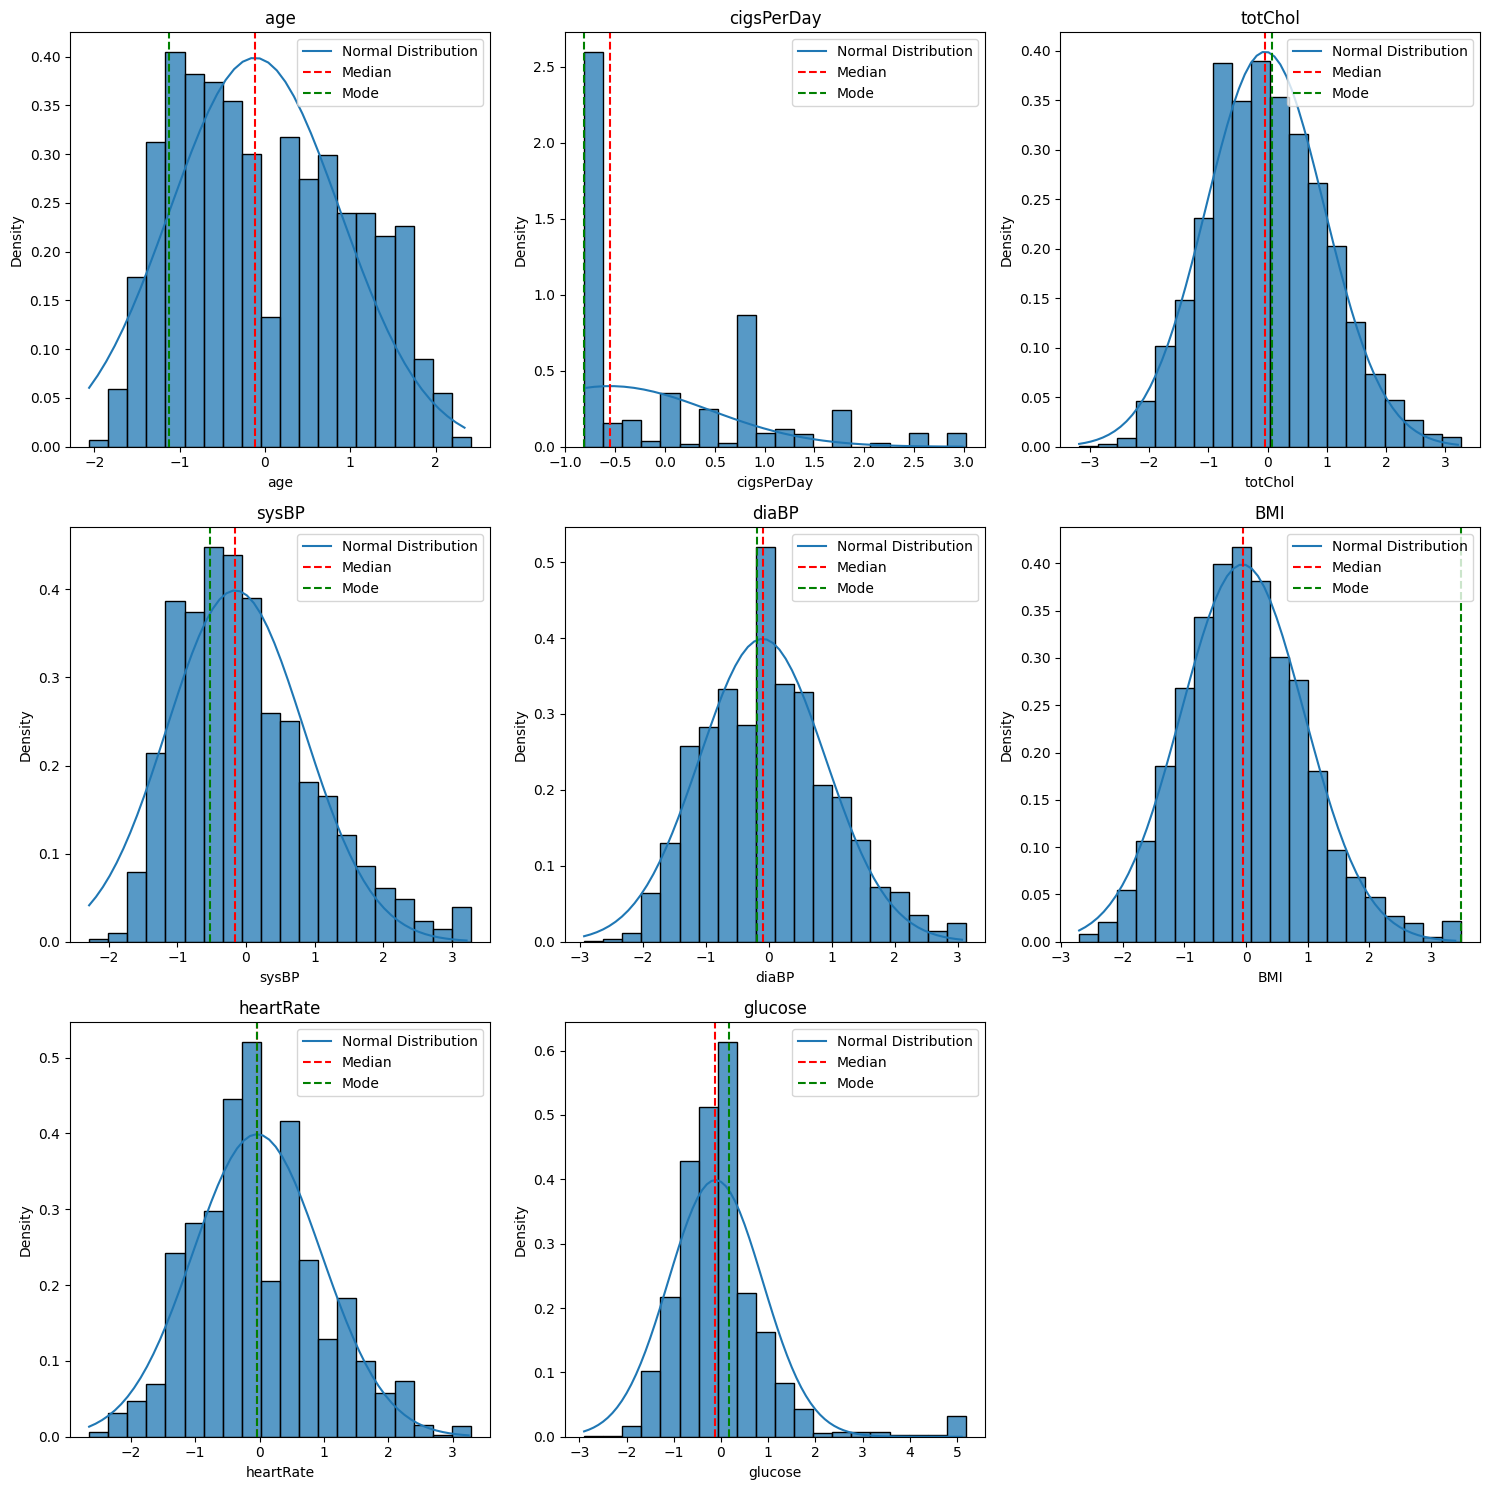

In [96]:
# View standard distribution
 #Cac cot du lieu lien tuc

cols = df.columns
num_cols = len(float_cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows for subplots

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # Create subplots

axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(float_cols):

    sns.histplot(df_combined[col], ax=axes[i], stat="density", bins = 20)  # Plot histogram on the current subplot
    axes[i].set_title(col)  # Set title for the subplot

    # Calculate and plot median and mode
    if col in float_cols:
      median = df_combined[col].median()
      mode = df_combined[col].mode()[0]
      rng = np.arange(df_combined[col].min(), df_combined[col].max(), 0.1)
      axes[i].plot(rng, stats.norm.pdf(rng, loc=median, scale=df_combined[col].std()), label='Normal Distribution')
      axes[i].axvline(median, color='r', linestyle='--', label='Median')
      axes[i].axvline(mode, color='g', linestyle='--', label='Mode')
      axes[i].legend()

# Hide any unused subplots
for i in range(num_cols, num_rows * 3):
    axes[i].set_visible(False)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()




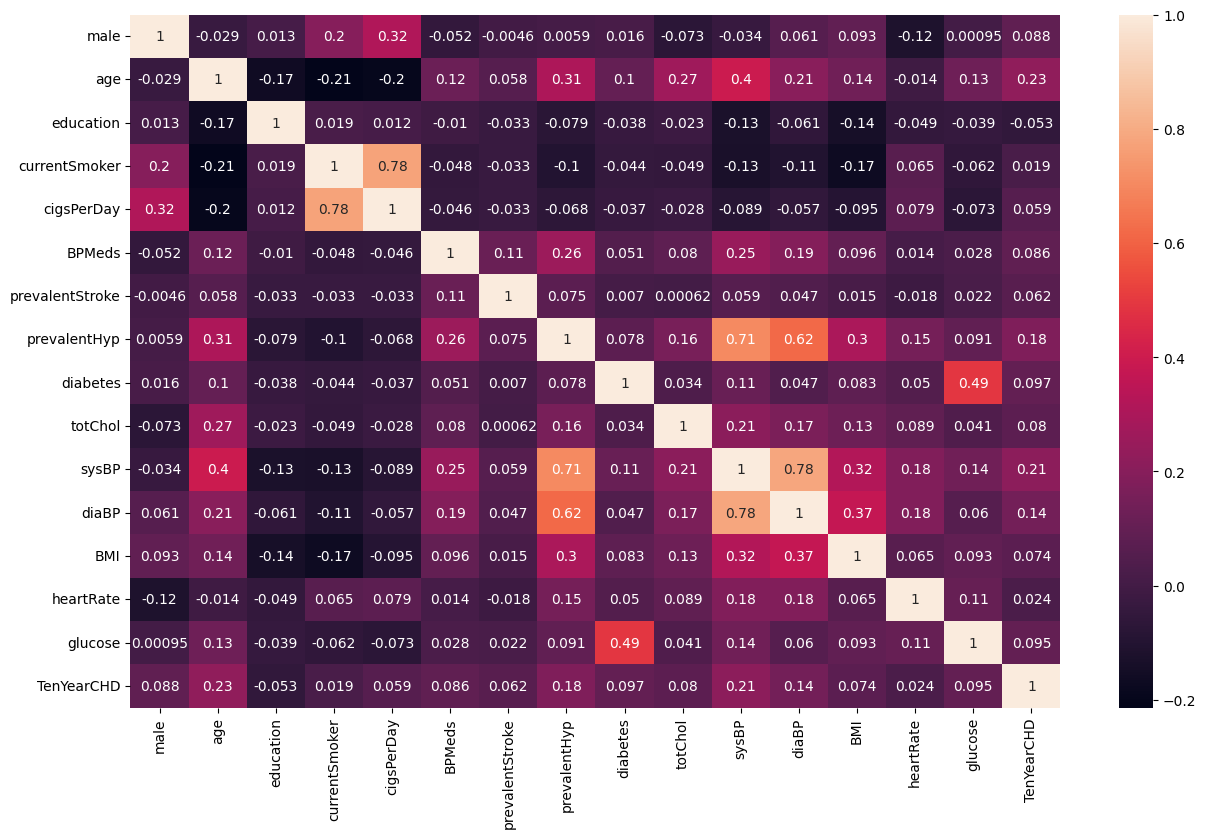

In [97]:
# Biểu đồ tương quan sử dụng biểu đồ nhiệt
cor = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(cor,annot=True)
plt.show()

## Phân tích hồi quy

In [98]:
# # Chia dữ liệu
# y = df.pop('TenYearCHD')
# X = df.copy()

In [99]:
# # Chia tập dữ liệu
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [100]:
# from google.colab import drive
# drive.mount('/content/drive')

In [101]:
X = df_combined.drop(columns = ['TenYearCHD'])
y = df_combined['TenYearCHD']

In [102]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

Fold 1/5
AUC - Fold 1: 0.8512841012922595
F1-Score - Fold 1: 0.6334164588528678
Best model updated at Fold 1 with AUC = 0.8512841012922595
Best model updated at Fold 1 with F1-Score = 0.6334164588528678
Confusion Matrix - Test (Fold 1):
 [[566  86]
 [ 61 127]]
Accuracy - Test (Fold 1): 0.825
Classification Report - Test (Fold 1):
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       652
           1       0.60      0.68      0.63       188

    accuracy                           0.82       840
   macro avg       0.75      0.77      0.76       840
weighted avg       0.83      0.82      0.83       840

Fold 2/5
AUC - Fold 2: 0.8309474785109651
F1-Score - Fold 2: 0.5804878048780487
Confusion Matrix - Test (Fold 2):
 [[548 103]
 [ 69 119]]
Accuracy - Test (Fold 2): 0.7949940405244339
Classification Report - Test (Fold 2):
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       651
        

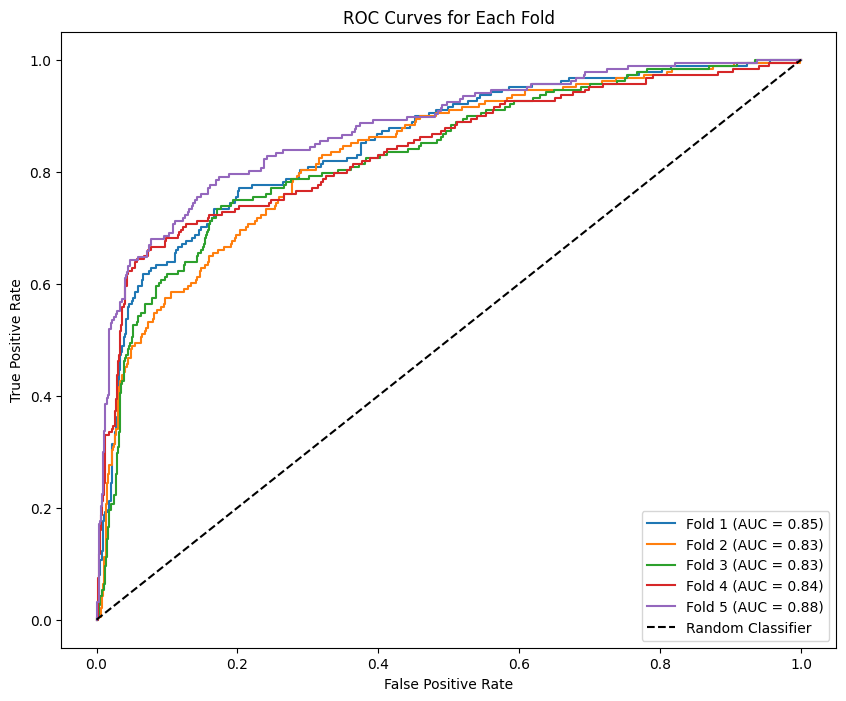


Best Model AUC: 0.8776040812309307
Best Model F1-Score: 0.6666666666666666


In [103]:
model_template = LogisticRegression(solver='liblinear', fit_intercept=True, class_weight='balanced', max_iter=1000)

# Số lượng fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Lưu kết quả và mô hình
fold_results = []
auc_scores = []
f1_scores = []
best_auc = -1  # Lưu AUC tốt nhất
best_model = None  # Lưu mô hình tốt nhất
best_f1 = -1  # Lưu F1 tốt nhất

plt.figure(figsize=(10, 8))
plt.title("ROC Curves for Each Fold")

# Vòng lặp qua từng fold
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold + 1}/{k}")

    # Chia dữ liệu
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Huấn luyện mô hình
    model = model_template
    model.fit(X_train, y_train)

    # Dự đoán trên tập test
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:, 1]

    # Tính AUC
    auc = roc_auc_score(y_test, y_prob_test)
    auc_scores.append(auc)

    # Tính F1-score
    f1 = f1_score(y_test, y_pred_test)
    f1_scores.append(f1)
    print(f"AUC - Fold {fold + 1}: {auc}")
    print(f"F1-Score - Fold {fold + 1}: {f1}")

    # Kiểm tra và cập nhật mô hình tốt nhất dựa trên AUC hoặc F1
    if auc > best_auc:
        best_auc = auc
        best_model = model
        print(f"Best model updated at Fold {fold + 1} with AUC = {best_auc}")

    if f1 > best_f1:
        best_f1 = f1
        print(f"Best model updated at Fold {fold + 1} with F1-Score = {best_f1}")

    # Vẽ ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    plt.plot(fpr, tpr, label=f"Fold {fold + 1} (AUC = {auc:.2f})")

    # Lưu độ chính xác
    fold_results.append(accuracy_score(y_test, y_pred_test))

    # In các thống kê chi tiết
    print(f"Confusion Matrix - Test (Fold {fold + 1}):\n", confusion_matrix(y_test, y_pred_test))
    print(f"Accuracy - Test (Fold {fold + 1}):", accuracy_score(y_test, y_pred_test))
    print(f"Classification Report - Test (Fold {fold + 1}):\n", classification_report(y_test, y_pred_test))

# Tính trung bình và độ lệch chuẩn của AUC và F1-score
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print(f"\nMean AUC across {k} folds: {mean_auc:.2f} ± {std_auc:.2f}")
print(f"Mean F1-Score across {k} folds: {mean_f1:.2f} ± {std_f1:.2f}")

# Vẽ đường chéo tham chiếu (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Hoàn thiện biểu đồ
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Lưu mô hình tốt nhất
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# In kết quả mô hình tốt nhất
print(f"\nBest Model AUC: {best_auc}")
print(f"Best Model F1-Score: {best_f1}")